In [ ]:
import pandas as pd

data = pd.read_csv('z_scores(England).csv')
ESEM_d = pd.read_csv('C:/Users/1/Desktop/new_d/ESEM d factor score.csv')
data = pd.merge(data, ESEM_d, on='eid')
data.to_csv('z_scores(England)ESEM.csv',index=False)

#### Extreme deviation plot

In [ ]:
import pandas as pd

index = pd.read_csv('index (England).csv')
d = index[['eid', 'dis count']]
ex = pd.read_csv('extreme_data.csv')
count = ex[['eid','Count_Greater_Than','Count_Less_Than']]
data = pd.merge(d, count, on='eid')
ESEM_d = pd.read_csv('ESEM d factor score.csv')
data = pd.merge(data, ESEM_d, on='eid')

In [ ]:
import random
import pandas as pd
import statsmodels.formula.api as smf

random_effects = [random.choice(['GroupA', 'GroupB', 'GroupC']) for _ in range(len(data))]

data['RandomEffect'] = random_effects

model = smf.mixedlm(formula = "ESEM_D ~ Count_Less_Than", 
                    data = data, 
                    groups = data['RandomEffect'])

result = model.fit()

print(result.summary())

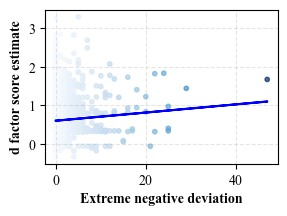

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator

mpl.rcParams['font.family'] = 'Times New Roman'

predicted = result.predict()

fig = plt.figure(figsize=(3, 2))
sc = plt.scatter(data['Count_Less_Than'], data['ESEM_D'], c=data['Count_Less_Than'], cmap='Blues', alpha=0.7, s=10)
plt.plot(data['Count_Less_Than'], predicted, c='b')

plt.xlabel('Extreme negative deviation', fontweight='bold')
plt.ylabel('d factor score estimate', fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.2, color='gray')
#plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

#plt.colorbar(sc, label='Count_Less_Than')
plt.savefig(f"Extreme_negative_GMV_scatter_ESEM.svg", dpi=400, bbox_inches='tight', transparent=True)

plt.show()

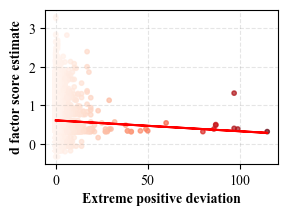

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

mpl.rcParams['font.family'] = 'Times New Roman'

predicted = result.predict()

fig = plt.figure(figsize=(3, 2))
sc = plt.scatter(data['Count_Greater_Than'], data['ESEM_D'], c=data['Count_Greater_Than'], cmap='Reds', alpha=0.7, s=10)
plt.plot(data['Count_Greater_Than'], predicted, c='r')

plt.xlabel('Extreme positive deviation', fontweight='bold')
plt.ylabel('d factor score estimate', fontweight='bold')

#plt.ylim(-0.1, 0.75)
plt.grid(True, linestyle='--', alpha=0.2, color='gray')
#plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.savefig(f"Extreme_positve_GMV_scatter_ESEM.svg", dpi=400, bbox_inches='tight', transparent=True)

plt.show()

In [ ]:
import random
import pandas as pd
import statsmodels.formula.api as smf

data = pd.read_csv('z_scores(England)ESEM.csv')
mean_values = data.iloc[:, 1:-14].mean(axis=1)

data['mean_GMV_z_value'] = mean_values

random_effects = [random.choice(['GroupA', 'GroupB', 'GroupC']) for _ in range(len(data))]

data['RandomEffect'] = random_effects

model = smf.mixedlm(formula = "ESEM_D ~ mean_GMV_z_value", 
                    data = data, 
                    groups = data['RandomEffect'])

result = model.fit()

print(result.summary())

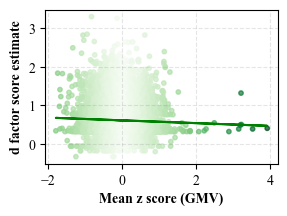

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

mpl.rcParams['font.family'] = 'Times New Roman'

predicted = result.predict()

fig = plt.figure(figsize=(3, 2))
sc = plt.scatter(data['mean_GMV_z_value'], data['ESEM_D'], c=abs(data['mean_GMV_z_value']), cmap='Greens', alpha=0.7, s=10)
plt.plot(data['mean_GMV_z_value'], predicted, c='g')

plt.xlabel('Mean z score (GMV)', fontweight='bold')
plt.ylabel('d factor score estimate', fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.2, color='gray')
#plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.savefig(f"Mean GMV ESEM.svg", dpi=400, bbox_inches='tight', transparent=True)

plt.show()

In [ ]:
data = pd.read_csv('z_scores(England).csv')
ESEM_d = pd.read_csv('ESEM d factor score.csv')
data = pd.merge(data, ESEM_d, on='eid')
data.to_csv('z_scores(England)ESEM.csv',index=False)

In [ ]:
from pyprocessmacro import Process
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('z_scores(England)ESEM.csv')
mean_values = data.iloc[:, 1:-14].mean(axis=1)

data['mean_GMV_z_value'] = mean_values

df = data.dropna(axis=0)
x1 = f'Living environment score (England)'
x2 = f'age'
y = f'mean_GMV_z_value'

mean_fa_value_mean = df[y].mean()
x1_imd_mean = df[x1].mean()
x2_imd_mean = df[x2].mean()
d_mean = df['ESEM_D'].mean()

df[y] = df[y] - mean_fa_value_mean
df[x1] = df[x1] - x1_imd_mean
df[x2] = df[x2] - x2_imd_mean
df['ESEM_D'] = df['ESEM_D'] - d_mean

p = Process(data=df, model=4, x=x1, m=['ESEM_D'], y=y,controls=["age", "sex"], controls_in="all")
p.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = Living environment score (England)
    m1 = ESEM_D
    y = mean_GMV_z_value
Statistical Controls:
 age, sex



Sample size:
8895

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = mean_GMV_z_value 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1   df2  p-value
 0.0049   0.0044 0.2211 11.0308    4  8890   0.0000

Coefficients

                                     coeff     se       t      p    LLCI    ULCI
Cons                                0.0169 0.0072  2.3380 0.0194  0.0027  0.0312
Living environment score (England) -0.0011 0.0004 -2.9428 0.0033 -0.0018 -0.0004
age    

In [9]:
"""brain as mediator"""
from pyprocessmacro import Process
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#data = pd.read_csv('z_scores(England).csv')
#mean_values = data.iloc[:, 1:-13].mean(axis=1)

data = pd.read_csv('z_scores(England)ESEM.csv')
mean_values = data.iloc[:, 1:-14].mean(axis=1)

data['mean_GMV_z_value'] = mean_values

df = data.dropna(axis=0)
x1 = f'Living environment score (England)'
x2 = f'age'
y = f'ESEM_D'

d_mean = df[y].mean()
x1_imd_mean = df[x1].mean()
x2_imd_mean = df[x2].mean()
mean_fa_value_mean = df['mean_GMV_z_value'].mean()

df[y] = df[y] - d_mean
df[x1] = df[x1] - x1_imd_mean
df[x2] = df[x2] - x2_imd_mean
df['mean_GMV_z_value'] = df['mean_GMV_z_value'] - mean_fa_value_mean

p = Process(data=df, model=4, x=x1, m=['mean_GMV_z_value'], y=y, controls=["age", "sex"], controls_in="all")
p.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = Living environment score (England)
    m1 = mean_GMV_z_value
    y = ESEM_D
Statistical Controls:
 age, sex



Sample size:
8895

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = ESEM_D 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1   df2  p-value
 0.0084   0.0078 0.1646 18.7519    4  8890   0.0000

Coefficients

                                     coeff     se       t      p    LLCI    ULCI
Cons                                0.0347 0.0062  5.5612 0.0000  0.0225  0.0470
Living environment score (England)  0.0005 0.0003  1.4776 0.1395 -0.0001  0.0011
age              